<a href="https://colab.research.google.com/github/kvijay0611/ANN-model-test/blob/main/ANN_Test_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)


2.17.1


Import Basic Libarries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset= pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Divide the dataset into independent and dependent features

In [6]:
X= dataset.iloc[:,3:13] #INDEPENDENT
y= dataset.iloc[:,13] #Dependent

In [7]:
print(X.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


In [8]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# Feature Engineering

In [9]:
print(X['Gender'].dtype)
print(X['Gender'].unique())


object
['Female' 'Male']


In [10]:
print(X['Gender'])
print(pd.get_dummies(X['Gender']))


0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object
      Female   Male
0       True  False
1       True  False
2       True  False
3       True  False
4       True  False
...      ...    ...
9995   False   True
9996   False   True
9997    True  False
9998   False   True
9999    True  False

[10000 rows x 2 columns]


In [11]:
Geography= pd.get_dummies(X['Geography'], drop_first=True).astype(int)
gender= pd.get_dummies(X['Gender'], drop_first=True).astype(int)
print(Geography.head())
print(gender.head())


   Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1
   Male
0     0
1     0
2     0
3     0
4     0


Concatenate variables with dataframes

In [12]:
X=X.drop(['Geography','Gender'], axis=1)

In [13]:
X =pd.concat([X,Geography,gender],axis=1)

Splitting dataset into Training set and Test Set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

# Feaature Scaling

In [15]:
  from sklearn.preprocessing import StandardScaler
  sc= StandardScaler()
  X_train= sc.fit_transform(X_train)
  X_test= sc.transform(X_test)

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_train.shape

(8000, 11)

# Create ANN model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


initialize the ANN

In [20]:
classifier = Sequential()

In [21]:
#input layer
classifier.add(Dense(units=11, activation='relu'))
#adding first layer
classifier.add(Dense(units=7, activation='relu'))
#adding second layer
classifier.add(Dense(units=6, activation='relu'))
#adding third layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [22]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

Early Stopping

In [24]:
import tensorflow as tf
from tensorflow import keras
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [25]:
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8039 - loss: 0.4911 - val_accuracy: 0.8118 - val_loss: 0.4355
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8206 - loss: 0.4219 - val_accuracy: 0.8209 - val_loss: 0.4049
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8226 - loss: 0.3998 - val_accuracy: 0.8429 - val_loss: 0.3853
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8464 - loss: 0.3729 - val_accuracy: 0.8516 - val_loss: 0.3742
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8593 - loss: 0.3415 - val_accuracy: 0.8459 - val_loss: 0.3740
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8514 - loss: 0.3605 - val_accuracy: 0.8493 - val_loss: 0.3686
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8636 - loss: 0.3328 - val_accuracy: 0.8459 - val_loss: 0.3687
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3262 - 

In [26]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Model accuracy

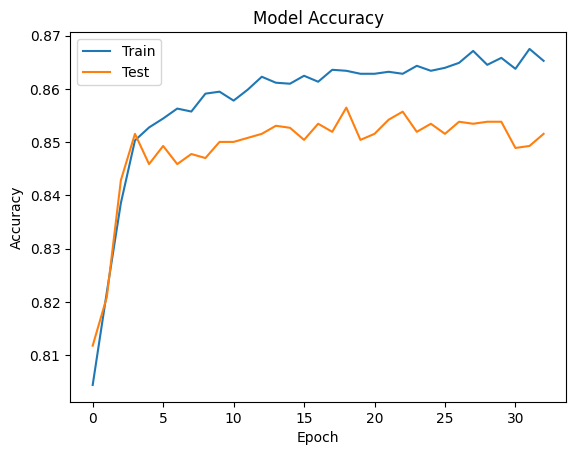

In [27]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

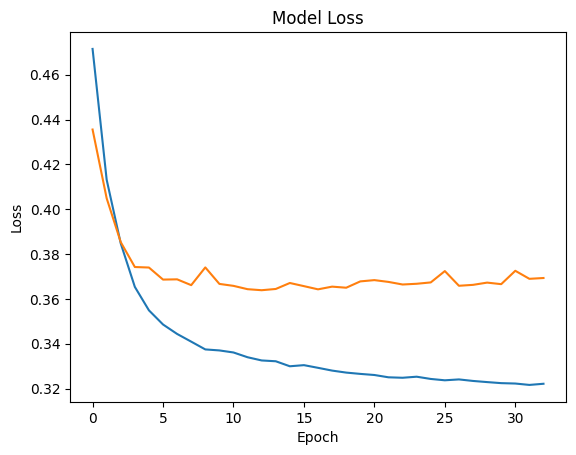

In [28]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Making The Predictions and Evaluating the Model

In [30]:
#predicting the test set results
y_pred= classifier.predict(X_test)
y_pred= (y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1535,   60],
       [ 216,  189]])

In [32]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)
score

0.862

In [33]:
#get the weights
classifier.get_weights()

[array([[ 2.67065763e-01,  1.60949945e-01,  9.41988139e-04,
         -1.79585129e-01,  2.94734299e-01,  2.62523949e-01,
         -5.70832491e-02, -2.56071806e-01, -3.76490235e-01,
         -2.97465175e-01, -1.73889950e-01],
        [-2.21354216e-01,  4.56145406e-01, -9.27265435e-02,
          3.27639490e-01, -2.51632243e-01,  6.16527140e-01,
         -6.49022281e-01,  4.47343290e-01, -4.11357522e-01,
          6.58060424e-04,  7.04214633e-01],
        [ 8.00746754e-02,  1.56231210e-01, -3.22410539e-02,
          2.33783633e-01,  4.80968386e-01,  1.02691408e-02,
         -2.02670589e-01, -1.22526720e-01,  3.12548786e-01,
          5.41700244e-01,  2.12942231e-02],
        [-7.46485814e-02, -2.96202339e-02, -4.99985158e-01,
         -8.05100381e-01,  5.97214997e-01, -3.58869225e-01,
         -7.18344077e-02, -9.12510827e-02,  4.92214084e-01,
         -6.77182138e-01,  3.87040409e-03],
        [ 6.70963705e-01,  3.33795339e-01, -1.25615848e-02,
         -1.75980330e-01,  5.23047447e-01, -